# TODO:
### 24Oct23 - 31Oct23
- use lat-lon for distance and make that the x axis of the layer
    - distance from... what exactly?
        - the exact placement of $d_0$ may not actually matter as long as it is noted on the plot that it is arbitrary (or however it is actually placed)
            - i.e. it is only useful for showing scale
    - this would put the plot in meters on both axes if reading the right side y axis scale
- get the distance between crossover points
    - *GPS time is not a useful measure of ~distance~ anything*
    - use the lat-lon coordinates to get the distance between points
        - i.e. get the 4 endpoints of the 2 segments and use the distance between them
    - **distance between points in the 2018 Antarctica DC8 20181030_01 flight is about 14.9m**
        - need to make distance step a variable that is read from this because it may change flight to flight
- find the slope in both directions across the segments
    - probably want to go out a bit from the crossover point to get a better slope
        - e.g. 2 or 3x crossover point distance
    - may have to normalize the slope if jagged
- find the plane heading on each segment
    - check for point to point consistency - wandering gps
        - i.e. make sure that the points in the segment are actually in a straight line with the surrounding points
        - can probably implement an if statement for this
            - `if heading(segment) ~= heading(segment + a_few_points_either_end), then segment is straight`
            - `else, use heading(segment + a_few_points_either_end)`


In [1]:
import math
from layer_class import *
from functions import *
from iceflow_library import *
from crossover_class import *

In [2]:
 # zoom = False 
zoom = True
seg_length = 100
season = "2018_Antarctica_DC8"
# season = "2016_Antarctica_DC8"
flight = "20181030_01"  # the flight date and frame number
# flight = "20181103_01"
# flight = "20181112_02"  # the problem flight
# flight = "20161024_05"
file_name = "layer_export_" + flight + ".pickle"

# TODO: make map plotter center on crossover point n. default to centering on the first crossover point if no n is given
# TODO: choose a crossover point or save the data for them or something. Do we already do this? Probably. Very tired.
    # Who is this we?

In [3]:

# if the file at filename exists, read in the layers from the pickle file
# otherwise, read in the layers from the layer files and save them to a pickle file
if not os.path.isfile(file_name):  # if the file does not exist
    print(f"File {file_name} does not exist. Making it...")
    mat_pickler(season, flight, testing_mode=True)  # make it
    
layers = read_layers(file_name)  # read in the layers from the pickle file

intersection_points_base, intersection_indices_base, segment_ends = cross_point(layers[0], seg_length, quiet=False)
# find the crossover points
print(f"len(intersection_indices): {len(intersection_indices_base)}")
print(f"len(intersection_points): {len(intersection_points_base)}")
intersection_indices = intersection_indices_base
intersection_points = intersection_points_base

File layer_export_20181030_01.pickle does not exist. Making it...
Reading data files...
--------------------
DATA MAT FILE KEYS:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, type
LAYER ATTRIBUTES MAT FILE KEYS:
header, version, globals, file_type, file_version, lyr_age, lyr_age_source, lyr_desc, lyr_group_name, lyr_id, lyr_name, lyr_order, param
--------------------

debug:
data_mat type: <class 'dict'>
data_mat[0] keys:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, typetwtt: [[4.08000000e-06 4.08000000e-06 4.08000000e-06 ... 2.74000000e-06
  2.74000000e-06 2.74000000e-06]
 [           nan            nan 3.01688198e-05 ... 3.18162268e-05
  3.18926571e-05 3.19058256e-05]
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]]
twtt[0]

In [4]:
intersection_indices = intersection_indices_base
intersection_points = intersection_points_base
print(f"len(intersection_indices): {len(intersection_indices)}")
print(f"len(intersection_points): {len(intersection_points)}")
removed = 0
i = 0
# if the crosover point headings do not have a difference of at least 75 degrees, then the crossover point is not valid and should be removed
while i < (len(intersection_indices)):
    print(f"iteration {i}")
    if abs(find_heading(layers[0], intersection_indices[i][0]) - find_heading(layers[0], intersection_indices[i][1])) < 75:
        print(f"heading on first segment: {find_heading(layers[0], intersection_indices[i][0])}")
        print(f"heading on second segment: {find_heading(layers[0], intersection_indices[i][1])}")
        print(f"intersection {i} is not valid")
        intersection_indices.pop(i)
        intersection_points.pop(i)
        segment_ends.pop(i)
        print(f"intersection {i} removed")
        # print(f"intersection_indices: {intersection_indices}")
        # print(f"intersection_points: {intersection_points}")
        # print(f"segment_ends: {segment_ends}")
        # print(section_break)
        # break   
        continue
    else:
        print(f"intersection {i} is valid")
        print(f"heading on first segment: {find_heading(layers[0], intersection_indices[i][0])}")
        print(f"heading on second segment: {find_heading(layers[0], intersection_indices[i][1])}")
        print(section_break)
        i += 1


len(intersection_indices): 1
len(intersection_points): 1
iteration 0
intersection 0 is valid
heading on first segment: -179.99246690477952
heading on second segment: 91.7828687328499
--------------------


In [6]:
posit = Twtt_Posit(layers[1], season, flight, intersection_indices)
# create a Twtt_Posit object to store the crossover point data
# print(f"posit.layer_name: {posit.layer_name}")

save_posit(posit)

Saving posit...
--------------------
posit.pickle saved in local directory of this python file.
--------------------


In [7]:
# def gps_time_to_seconds(gps_time):
#     """
#     :param gps_time: the gps time in seconds
#     :return: the gps time in seconds
#     """
#     return gps_time * 10 ** -9

In [8]:
print(layers[0].gps_time[0])
# time is epoch seconds from 1970
print(gps_time_to_date(layers[0].gps_time[0]))

1540923785.6594396
2018-10-30 13:23:05.659440


In [9]:
# intersection indices are just the indices of the crossover point, not the indices of the endpoints of the segments
index_to_check = 1
print(np.shape(intersection_indices))
time1 = layers[0].gps_time[intersection_indices[0][index_to_check]]
time2 = layers[0].gps_time[intersection_indices[0][index_to_check]+1]
print(f"time1: {time1}, time2: {time2}")
d_time = time2 - time1

print(f"Time between segment 1 endpoints: {d_time} s")
dist = latlon_dist(segment_ends[0][0][0], segment_ends[0][0][1])
print(f"Distance between segment 1 endpoints: {round(dist,2)} m")
# print(f"type of dist: {type(dist)}")
# print(f"type of d_time: {type(d_time)}")
vel = dist / d_time
print(f"Plane velocity: {round(vel,2)} m/s or {round(vel * 3.6,2)} km/h")

# print(layers[1].layer_name)
slope = slope_around_index(layers[1], intersection_indices[0][index_to_check], 2)
print(f"slope at crossover {index_to_check}: {round(slope,2)}")

(1, 2)
time1: 1540925108.9837148, time2: 1540925109.089813
Time between segment 1 endpoints: 0.10609817504882812 s
Distance between segment 1 endpoints: 14.93 m
Plane velocity: 140.75 m/s or 506.69 km/h
rise: 6.53m, run: 59.73m
slope at crossover 1: 0.11


In [10]:
"""
Clean this up and put it in a function in the library file (?)
"""

print("Comparing my depth to CReSIS depth...")
print("--------------------")
twtt_at_intersect = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
# find the twtt at the crossover points
twtt_difference_at_intersect = twtt_at_intersect[0][0] - twtt_at_intersect[0][1]
# find the difference in twtt at the crossover points
print(f"twtt difference at crossover point: {twtt_difference_at_intersect} ns")

my_refractive_index = 1.77
# my_depth_1 = twtt_to_depth(twtt_at_intersect[0][0], my_refractive_index)
# my_depth_2 = twtt_to_depth(twtt_at_intersect[0][1], my_refractive_index)
#
# print(f"By my refractive index: {my_refractive_index}")
# print(f"depth at crossover point on segment 1: {my_depth_1} m")
# print(f"depth at crossover point on segment 2: {my_depth_2} m")
# print(f"difference: {my_depth_1 - my_depth_2} m")

# loop through all intersections and print the depth at each
for i in range(len(intersection_indices)):
    my_depth_1 = twtt_to_depth(twtt_at_intersect[i][0], my_refractive_index)
    my_depth_2 = twtt_to_depth(twtt_at_intersect[i][1], my_refractive_index)
    print(f"depth at crossover point {i} on segment 1: {my_depth_1} m")
    print(f"depth at crossover point {i} on segment 2: {my_depth_2} m")
    print(f"difference: {my_depth_1 - my_depth_2} m")

print(f"crossover point lat-long: {intersection_points[0]}")

Comparing my depth to CReSIS depth...
--------------------
twtt difference at crossover point: -3.008232096785966e-07 ns
depth at crossover point 0 on segment 1: 1790.344531079254 m
depth at crossover point 0 on segment 2: 1815.8203868569365 m
difference: -25.475855777682455 m
crossover point lat-long: [-87.97979626378307, -130.00290123313295]


In [11]:
cresis_refractive_index = math.sqrt(3.15)
# cresis_refractive_index = 1.785
cresis_depth_1 = twtt_to_depth(twtt_at_intersect[0][0], cresis_refractive_index)
cresis_depth_2 = twtt_to_depth(twtt_at_intersect[0][1], cresis_refractive_index)

print(f"By CReSIS refractive index: {cresis_refractive_index}")
print(f"depth at crossover point on segment 1: {cresis_depth_1} m")
print(f"depth at crossover point on segment 2: {cresis_depth_2} m")
print(section_break)
"""
End of the cleanup (for now)
"""

By CReSIS refractive index: 1.7748239349298849
depth at crossover point on segment 1: 1785.4784114884435 m
depth at crossover point on segment 2: 1810.8850244144064 m
--------------------


'\nEnd of the cleanup (for now)\n'

In [12]:
# save the crossover point data to crossovers.json
# save_crossover()

In [13]:
def plot_layers_at_cross(layers, intersection_indices, intersection_points, zoom=False, refractive_index=1.77,
                         cross_index=0):
    """
    :param layers: a list of Layer objects
    :param intersection_indices: a list of indices in the lat-lon arrays where the flight path
    crosses over itself
    :param intersection_points: a list of lat-lon points where the flight path crosses over itself
    :return: nothing (plots the layers and the map)
    """
    plt.figure(figsize=(24, 12), layout='constrained')
    print("Plotting layers and map...")
    print("--------------------")
    print("Adjusting for surface twtt...")
    for layer in layers:
        corrected_layer = layer.twtt - layers[0].twtt
        layer.twtt_corrected = corrected_layer

    # ax2 will be the layer plot
    plt.subplot(1, 2, 1)

    # plot the layer depths vs index for 500 points before and after the first
    # crossover point for each layer.
    # also plot the layer depths vs index for 500 points before and after the
    # second crossover point for each layer.
    offset = 500
    # plot the corrected twtt for each layer
    plt.plot(
        layers[0].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[0].layer_name)
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[1].layer_name + ' segment 1')
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][1] - offset:intersection_indices[cross_index][1] + offset],
        label=layers[1].layer_name + ' segment 2')

    # plot uncorrected twtt for each layer
    # plt.plot(layers[0].twtt[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
    #             label=layers[0].layer_name)
    # plt.plot(layers[1].twtt[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
    #             label=layers[1].layer_name + ' segment 1')
    # plt.plot(layers[1].twtt[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset],
    # label=layers[1].layer_name + ' segment 2')

    # invert the y-axis because the twtt increases with depth
    plt.gca().invert_yaxis()
    # plot the crossover point on the plot
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][0], color='red',
                label='X Point 1')
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][1], color='green',
                label='X Point 2')
    # plot a line at the crossover point
    plt.axvline(x=offset, color='black', label='X Point', linestyle='--', linewidth=0.3)

    # set the y axis to be in nanoseconds instead of seconds
    plt.ylabel("Adjusted Two Way Travel Time (ns)")
    plt.xlabel("Index")

    # force the y values to be displayed in 1e-6 ticks (microseconds) instead of 1e-5 ticks (tens of microseconds)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)

    def s_to_ms(x, pos):
        """
        :param x: the x value
        :param pos: the position
        :return: the x value in milliseconds
        """
        return '%1.1f' % (x * 1e6)

    # set the y axis to be in microseconds instead of seconds
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(s_to_ms))

    # make the right side y axis show the depth in meters by converting the twtt to depth using the refractive index
    min_y, max_y = plt.ylim()
    n = refractive_index
    c = 299792458  # m/s
    v = c / n
    # depth = twtt * v / 2
    scale_factor = v / 2
    print(f"scale factor: {scale_factor}")
    plt.twinx()
    plt.ylim(min_y * scale_factor, max_y * scale_factor)
    plt.ylabel("Depth (m)")

    # make the top of the x axis be the distance in meters by converting the lat-lon to distance using the haversine formula
    min_x, max_x = plt.xlim()
    scale_factor = latlon_dist((layers[0].lat[0], layers[0].lon[0]), (layers[0].lat[1], layers[0].lon[1]))
    print(f"scale factor: {scale_factor}")
    plt.twiny()
    plt.xlim(min_x * scale_factor, max_x * scale_factor)
    plt.xlabel("Distance (m)")

    plt.title("Adjusted Two Way Travel Time vs Index")
    plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))

    """
    plot the map
    """
    plt.subplot(1, 2, 2)

    # TODO: add an offset to the zoom settings so that the crossover point is in the center of the zoomed in map

    # # this code sets up a polar stereographic map of antarctica with the South Pole in the center
    zoom_out_to_continent = not zoom
    if zoom_out_to_continent:
        llcrnrx = -400000
        llcrnry = -400000
        urcrnrx = 250000
        urcrnry = 250000
    else:
        llcrnrx= -50000
        llcrnry= -50000
        urcrnrx= 50000
        urcrnry= 50000
    lat_0 = intersection_points[cross_index][0]
    lon_0 = intersection_points[cross_index][1]
    m = Basemap(projection='ortho', lat_0=lat_0, lon_0=lon_0, llcrnrx=llcrnrx, 
                llcrnry=llcrnry, urcrnrx=urcrnrx, urcrnry=urcrnry, resolution='c')

    m.drawcoastlines()
    m.fillcontinents(color='grey', lake_color='aqua')
    m.drawparallels(np.arange(-80., 81., 20.))
    m.drawmeridians(np.arange(-180., 181., 20.))
    m.drawmapboundary(fill_color='aqua')

    # plot the flight path
    m.plot(layers[0].lon, layers[0].lat, latlon=True, color='lightgreen', linewidth=1)
    # plot the section of the flight path in the plot above
    m.plot(layers[0].lon[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
           layers[0].lat[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset], latlon=True,
           color='red', linewidth=1)
    m.plot(layers[0].lon[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset],
           layers[0].lat[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset], latlon=True,
           color='green', linewidth=1)
    # plot labels for the flight paths at their start points
    plt.text(
        m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[
            0],
        m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[
            1], '\nsegment 1', fontsize='smaller', fontweight='bold', ha='right', va='top', color='red')
    plt.text(
        m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[
            0],
        m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[
            1], '\nsegment 2', fontsize='smaller', fontweight='bold', ha='left', va='top', color='green')
    # plot the South Pole
    m.scatter(0, -90, latlon=True, color='black', linewidth=1, label='South Pole')
    # plot the crossover points
    for point in intersection_points:
        m.scatter(point[1], point[0], latlon=True, color='darkred', linewidth=1, label='Crossover Point')
        plt.text(m(point[1], point[0])[0], m(point[1], point[0])[1] - 10000, 'Crossover Point\n\n',
                 fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # m.scatter(intersection_points[cross_index][1], intersection_points[cross_index][0], latlon=True, color='darkred',
    #           linewidth=1, label='Crossover Point')
    # plt.text(m(intersection_points[cross_index][1], intersection_points[cross_index][0])[0],
    #          m(intersection_points[cross_index][1], intersection_points[cross_index][0])[1] - 10000,
    #          'Crossover Point\n\n',
    #          fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # plot the crossover line

    x, y = m(0, -90)
    plt.text(x, y, '\nSouth Pole', fontsize='smaller', fontweight='bold', ha='center', va='top', color='black')
    plt.title("Lat-Lon Map")
    # set tight layout
    # plt.tight_layout()

    # save the plot
    plt.savefig("layer_plot.png", dpi=250)

    plt.show()

    print("plotted map")
    print("--------------------\n")

2018_Antarctica_DC8 20181030_01
Plotting layers and map...
--------------------
Adjusting for surface twtt...
scale factor: 84687135.0282486
scale factor: 14.933140956571789


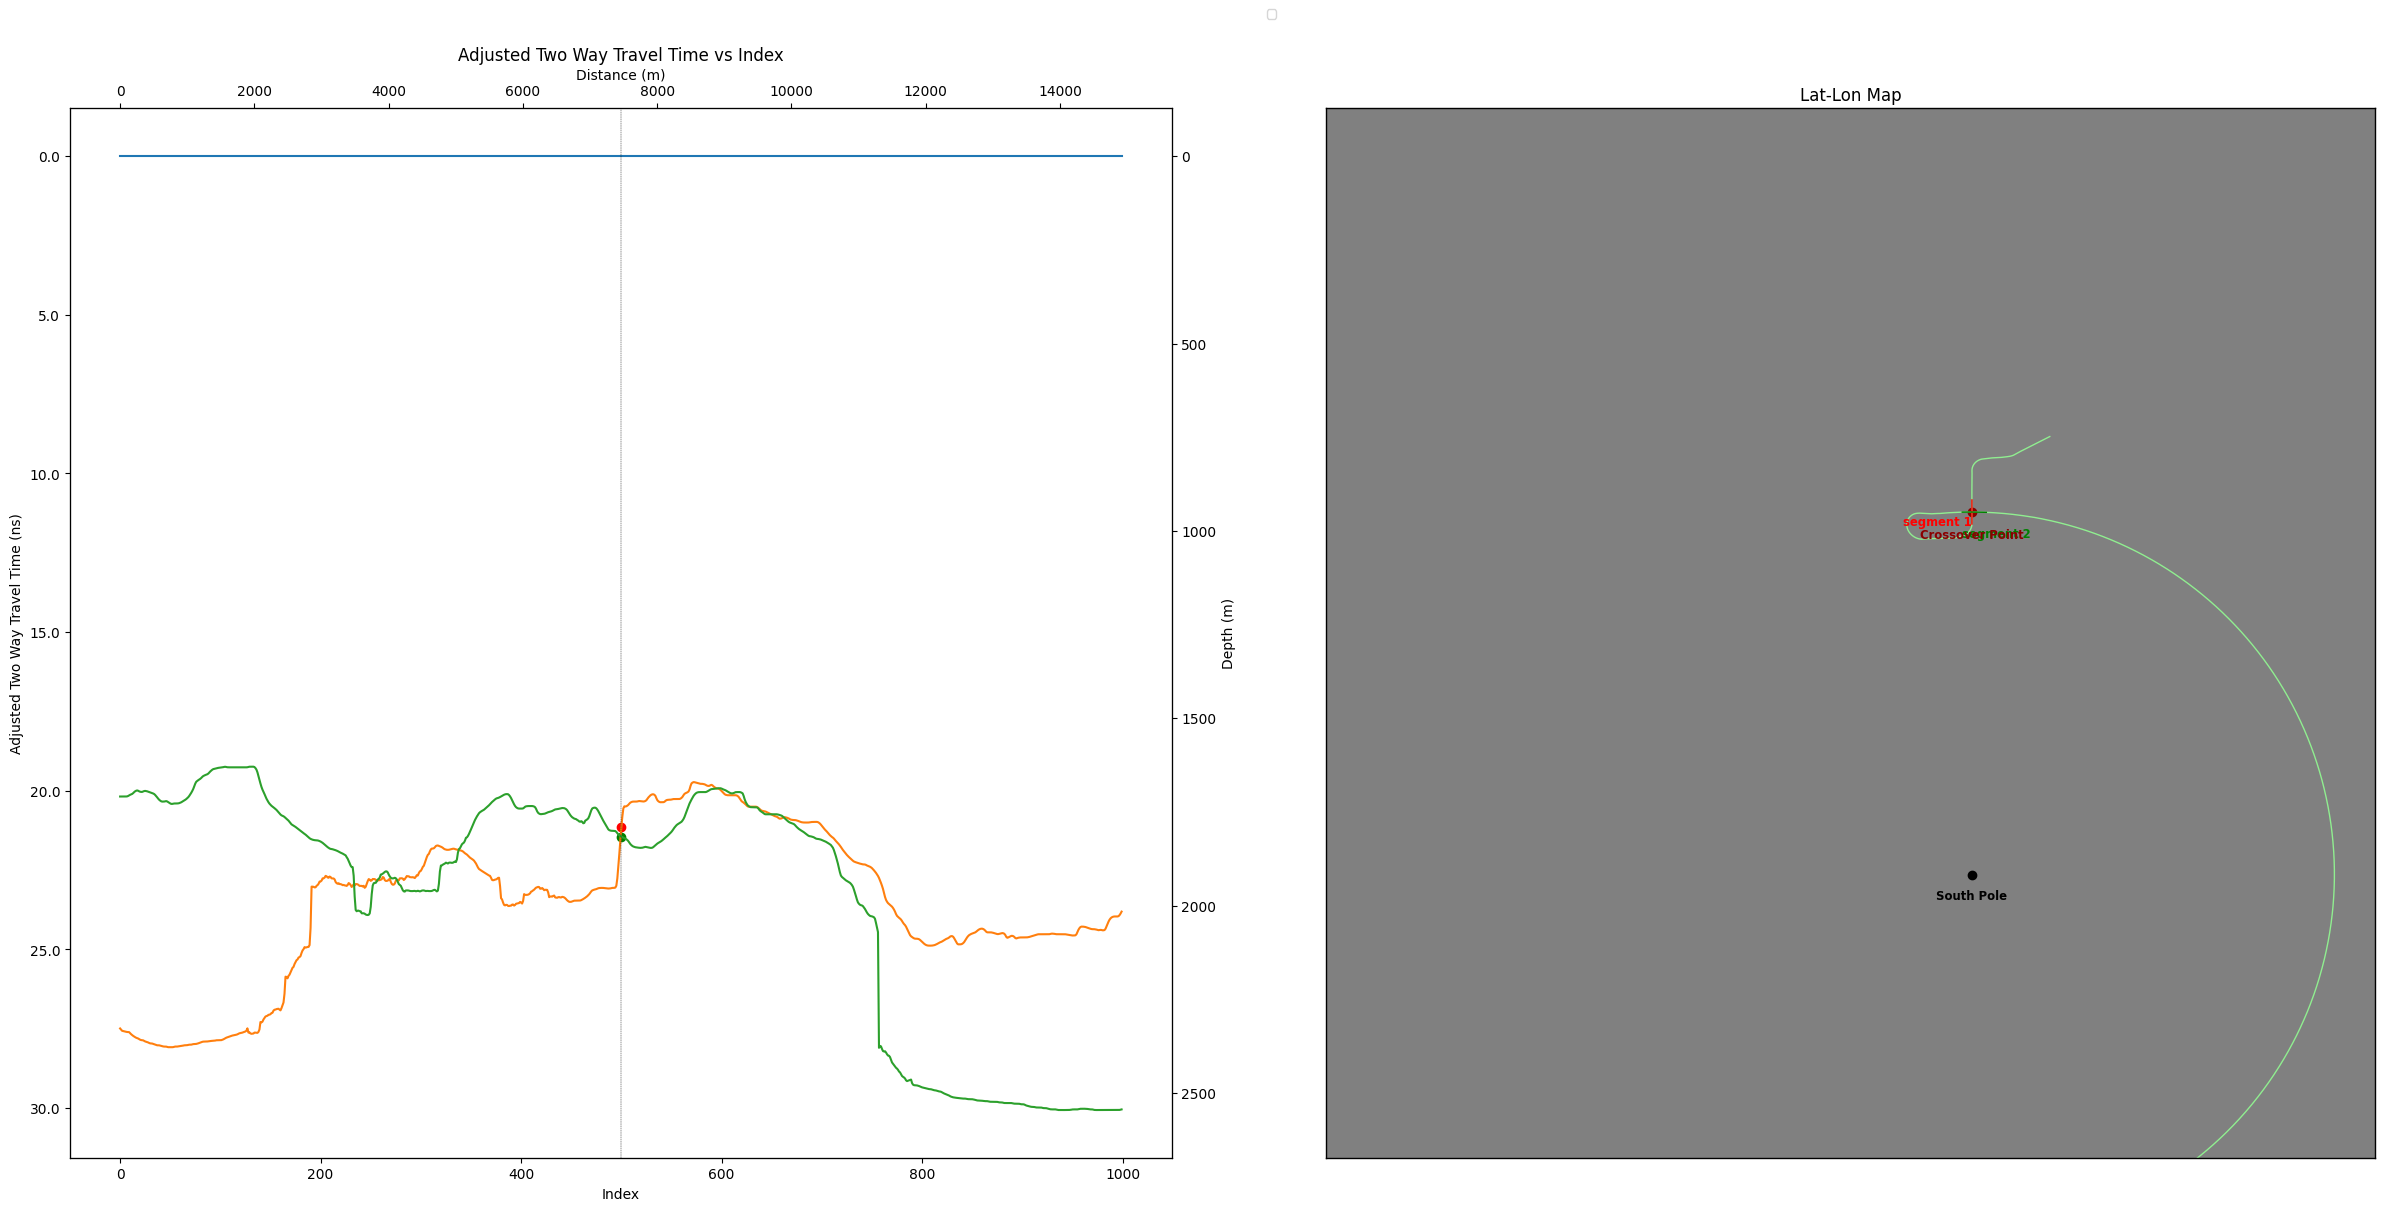

plotted map
--------------------

2184.928083728814 m
2582.9576183615823 m
difference: -398.02953463276845 m


In [14]:
print(season, flight)
cross_index = 0
plot_layers_at_cross(layers, intersection_indices, intersection_points,zoom=False, refractive_index=my_refractive_index,cross_index=cross_index)


# convert 25.8 microseconds to seconds
time = 25.8 * 10 ** -6
time2 = 30.5 * 10 ** -6

print(f"{twtt_to_depth(time, 1.77)} m")
print(f"{twtt_to_depth(time2, 1.77)} m")
print(f"difference: {twtt_to_depth(time, 1.77) - twtt_to_depth(time2, 1.77)} m")

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iceflow_library as iceflow
from iceflow_library import *

In [15]:
try:
    iceflow_data = iceflow.iceflow_data_file_loader()
    print("The iceflow data pickle file was found and loaded.")
except FileNotFoundError:
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow.iceflow_saver()
    iceflow_data = iceflow.iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")

print(f"Iceflow data array layout is 0:x, 1:y, 2:v_x, 3:v_y, 4:latitude, 5:longitude")

The iceflow data pickle file was not found. Creating a new one...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rj\\Documents\\cresis\\iceflow\\antarctic_ice_vel_phase_map_v01.nc'

In [ ]:
# find the nearest iceflow data point to the crossover point
# print(f"intersection_points[0]: {intersection_points[0]}")
x_lat = intersection_points[0][0]
y_lon = intersection_points[0][1]
print(f"x_lat: {x_lat}, y_lon: {y_lon}")

# convert the crossover point lat-lon to polar stereographic
from pyproj import Transformer
polar_stereo_format = "EPSG:3031"  # the polar stereographic projection for Antarctica
lat_lon_format = "EPSG:4326"  # the lat-lon projection
transformer = Transformer.from_crs(lat_lon_format, polar_stereo_format)
point = transformer.transform(x_lat, y_lon)
x_point = point[0]
y_point = point[1]
print(f"type of x_point: {type(x_point)}")
# print the nearest x and y iceflow data points to the crossover point
closest_x_y = find_nearest_x_and_y(x_point, y_point, iceflow_data)
print(f"closest_x_y: {closest_x_y}")
# print the iceflow data at the nearest x and y points
print(iceflow_data[4][closest_x_y[0]][closest_x_y[1]])
print(iceflow_data[5][closest_x_y[0]][closest_x_y[1]])

In [ ]:
cross_index = 2
plot_layers_at_cross(layers, intersection_indices, intersection_points,zoom=zoom, refractive_index=my_refractive_index,cross_index=cross_index)

In [ ]:
# TODO: now that everything is in the library file -> look at the plot_layers_at_cross function and see if the corrected
    # layer portion is something that should be its own function and if it needs to be part of the posit object that is
    # being saved.

In [ ]:
# find the difference in lat-lon between each of the 4 points in the crossover
